In [3]:
import torch 
import pandas as pd 

## 使用不同的类别柱状图证明，raw， cam， multiscale， cam + ms分别针对不同的类别得到更好的效果。

In [ ]:
from matplotlib import pyplot as plt


plt.rcParams["figure.dpi"] = 400
# paths = {
# 'raw_path': '/home/zhulifu/unsup_seg/trials_unsupervised_segmentation/gen_files/resnet18_320_hist.pth',
# 'cam_path': '/home/zhulifu/unsup_seg/trials_unsupervised_segmentation/gen_files/resnet50_320_cam_multiscalehist.pth',
# 'ms_path':  '/home/zhulifu/unsup_seg/trials_unsupervised_segmentation/gen_files/resnet18_320_multiscalehist.pth',
# 'camms_path': '/home/zhulifu/unsup_seg/trials_unsupervised_segmentation/gen_files/resnet50_320_multiscalehist.pth'
# }
labels = [
    # 'BASIC', 
          "+CF", "+MS"
        #   , "+CF&MS"
          ]
paths = {
    # labels[0] + '_path': '/home/zhulifu/unsup_seg/trials_unsupervised_segmentation/gen_files/resnet18_320_hist.pth',
    labels[1 -1] + '_path': '/home/zhulifu/unsup_seg/trials_unsupervised_segmentation/gen_files/resnet18_320_multiscalehist.pth',
    labels[2 -1] + '_path' : '/home/zhulifu/unsup_seg/trials_unsupervised_segmentation/gen_files/resnet50_320_camhist.pth',
    # labels[3 -1] +'_path':'/home/zhulifu/unsup_seg/trials_unsupervised_segmentation/gen_files/resnet50_320_multiscalehist.pth'
}
dic = {
    "classes": [
            'road', 'sidewalk', 'parking', 'rail track', 'building',
            'wall', 'fence', 'guard rail', 'bridge', 'tunnel',
            'pole', 'polegroup', 'traffic light', 'traffic sign', 'vegetation',
            'terrain', 'sky', 'person', 'rider', 'car',
            'truck', 'bus', 'caravan', 'trailer', 'train',
            'motorcycle', 'bicycle'
            # , 'unknown'
            ],
}
st = {
    'things': ['car', 'truck', 'bus', 'caravan', 'trailer', 'train',
            'motorcycle', 'bicycle', 'traffic light', 'traffic sign', 'person', 'rider'],
}
st['stuff'] = list(set(dic['classes']) - set(st['things']))
nd = {
    'categories' : ['stuff', 'things'],
}

for key in labels:
    histogram = torch.load(paths[key + '_path'])
    tp = torch.diag(histogram)
    fp = torch.sum(histogram, dim=0) - tp
    fn = torch.sum(histogram, dim=1) - tp

    iou = tp / (tp + fp + fn)
    prc = tp / (tp + fn)
    dic[key] = iou

for k in dic:
    print(len(dic[k]))
f = pd.DataFrame(dic)
f = f.sort_values(by='+CF', ascending=False)
print(f)
# plt.tight_layout()
# f[:7].plot.bar(x='classes', rot=-30)



In [13]:

print(dic)
print(nd)

{'classes': ['road', 'sidewalk', 'parking', 'rail track', 'building', 'wall', 'fence', 'guard rail', 'bridge', 'tunnel', 'pole', 'polegroup', 'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus', 'caravan', 'trailer', 'train', 'motorcycle', 'bicycle'], '+CF': tensor([3.8892e-01, 1.2328e-01, 4.6312e-02, 5.1066e-03, 2.1967e-01, 2.9640e-02,
        1.2123e-02, 7.4049e-04, 1.1333e-02, 5.8484e-03, 4.1942e-02, 0.0000e+00,
        2.6700e-03, 9.1475e-02, 2.5801e-01, 2.5790e-02, 5.3505e-01, 2.2201e-01,
        8.1187e-07, 4.6507e-01, 3.3739e-04, 2.0610e-03, 8.6750e-05, 7.1626e-06,
        4.0177e-04, 2.1274e-04, 1.8811e-01]), '+MS': tensor([1.5186e-01, 2.9243e-02, 1.2454e-03, 8.7821e-03, 2.7737e-01, 2.6272e-03,
        1.8978e-02, 1.1888e-04, 6.2333e-03, 1.6327e-03, 3.0529e-02, 1.4067e-05,
        1.4092e-03, 3.0579e-02, 2.9591e-01, 1.0631e-01, 5.0912e-01, 1.7195e-01,
        2.5029e-04, 1.7725e-01, 1.8020e-03, 1.0434e-04, 0.0000e+00, 0.0000

  categories      base       +lf       +ms    +lf&ms
0      stuff  0.255444  0.219558  0.195931  0.221174
1     things  0.113744  0.182363  0.224879  0.206586
2        all  0.192467  0.203027  0.208797  0.214690


<AxesSubplot:xlabel='categories'>

<Figure size 2400x1600 with 0 Axes>

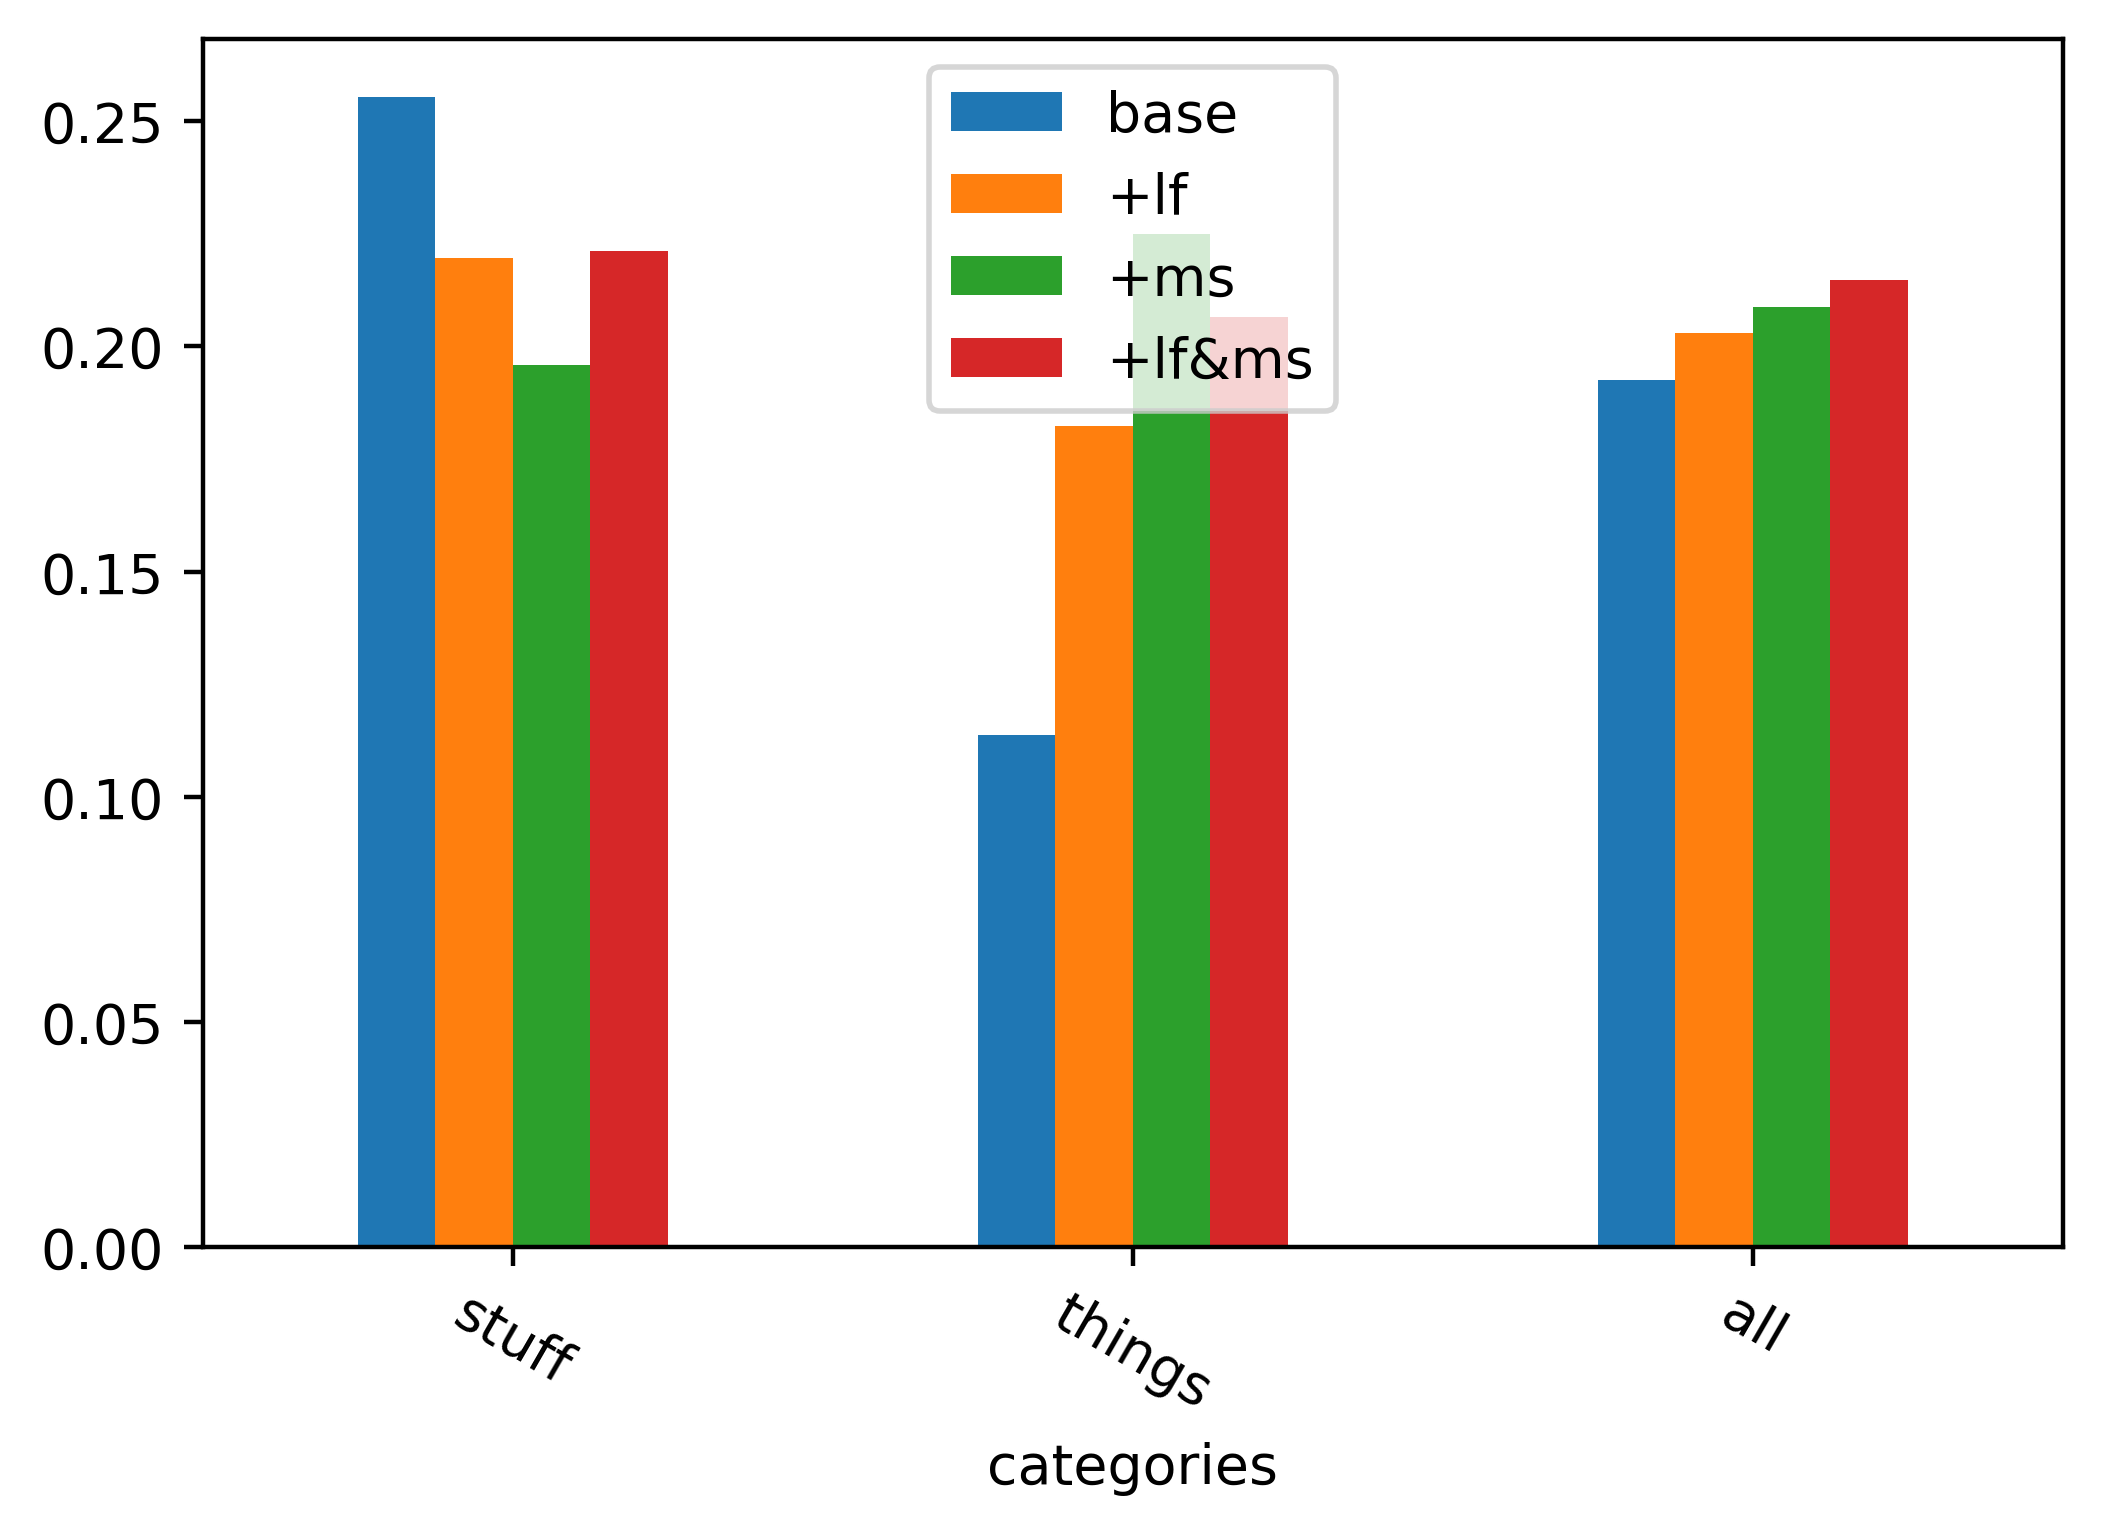

In [16]:
import torch 
import pandas as pd 
from matplotlib import pyplot as plt
plt.rcParams["figure.dpi"] = 400

directory = './gen_files/'

classes = [
            'road', 'sidewalk', 'parking', 'rail track', 'building',
            'wall', 'fence', 'guard rail', 'bridge', 'tunnel',
            'pole', 'polegroup', 'traffic light', 'traffic sign', 'vegetation',
            'terrain', 'sky', 'person', 'rider', 'car',
            'truck', 'bus', 'caravan', 'trailer', 'train',
            'motorcycle', 'bicycle'
            # , 'unknown'
            ]
things = ['car', 'truck', 'bus', 'caravan', 'trailer', 'train',
            'motorcycle', 'bicycle', 'traffic light', 'traffic sign', 'person', 'rider']

stuff = list(set(classes) - set(things))
nd = {
    'categories' : ['stuff', 'things', 'all'],
}

combinations = [
    ('stego', 320, 1, '', 'base'),
    ('resnet18', 320, 20.3 / 24, '', '+lf'),
    ('resnet50', 320, 20.4 / 36, 'multiscale', '+ms'),
    ('swinv2', 384, 21.3 / 38, 'dino_multiscale', '+lf&ms'),
    
]
for arch, res, scale, method, description in combinations:
    filename = f'{directory}/{arch}_{res}_{method}hist.pth'
    histogram = torch.load(filename)
    tp = torch.diag(histogram)
    fp = torch.sum(histogram, dim=0) - tp
    fn = torch.sum(histogram, dim=1) - tp

    iou = tp / (tp + fp + fn)
    prc = tp / (tp + fn)
    iou = torch.nan_to_num(iou[:27], nan=0) * scale
    
    all_iou = torch.sum(iou) / 27
    # print(f'{filename}:\n {iou}')
    stuff_iou = 0
    thing_iou = 0
    for i, v in enumerate(iou):
        if classes[i] in stuff:
            stuff_iou += v 
        else:
            thing_iou += v 
    stuff_iou /= len(stuff)
    thing_iou /= len(things)
    nd[description] = [stuff_iou.item(), thing_iou.item(), all_iou.item()]
f = pd.DataFrame(nd)
# f = f.sort_values(by='base', ascending=False)
print(f)
plt.tight_layout()
f.plot.bar(x='categories', rot=-30)


In [42]:
import torch 
import pandas as pd 
from matplotlib import pyplot as plt
plt.rcParams["figure.dpi"] = 400

res_high = '/home/zhulifu/unsup_seg/trials_unsupervised_segmentation/gen_files/resnet18_320_layer4hist.pth'
res_low = '/home/zhulifu/unsup_seg/trials_unsupervised_segmentation/gen_files/resnet18_320_layer2hist.pth'
nd = {
    'classes' : [
            'road', 'sidewalk', 'parking', 'rail track', 'building',
            'wall', 'fence', 'guard rail', 'bridge', 'tunnel',
            'pole', 'polegroup', 'traffic light', 'traffic sign', 'vegetation',
            'terrain', 'sky', 'person', 'rider', 'car',
            'truck', 'bus', 'caravan', 'trailer', 'train',
            'motorcycle', 'bicycle'
            # , 'unknown'
            ]
}
for layer in ['high', 'low']:
    filename = eval(f'res_{layer}')
    histogram = torch.load(filename)
    tp = torch.diag(histogram)
    fp = torch.sum(histogram, dim=0) - tp
    fn = torch.sum(histogram, dim=1) - tp

    iou = tp / (tp + fp + fn)
    prc = tp / (tp + fn)
    iou = torch.nan_to_num(iou[:27], nan=0)
    nd[layer] = iou 


f = pd.DataFrame(nd)
# f = f.sort_values(by='low', ascending=False)

# f = f.sort_values(by='base', ascending=False)
# print(f)
plt.tight_layout()
rd = [16, 14, 0, 19, 4, 1, 17]
# f[rd].plot.bar(x='classes', rot=-30)

<Figure size 2400x1600 with 0 Axes>

In [43]:
f1 = f.iloc[rd]

<AxesSubplot:xlabel='classes'>

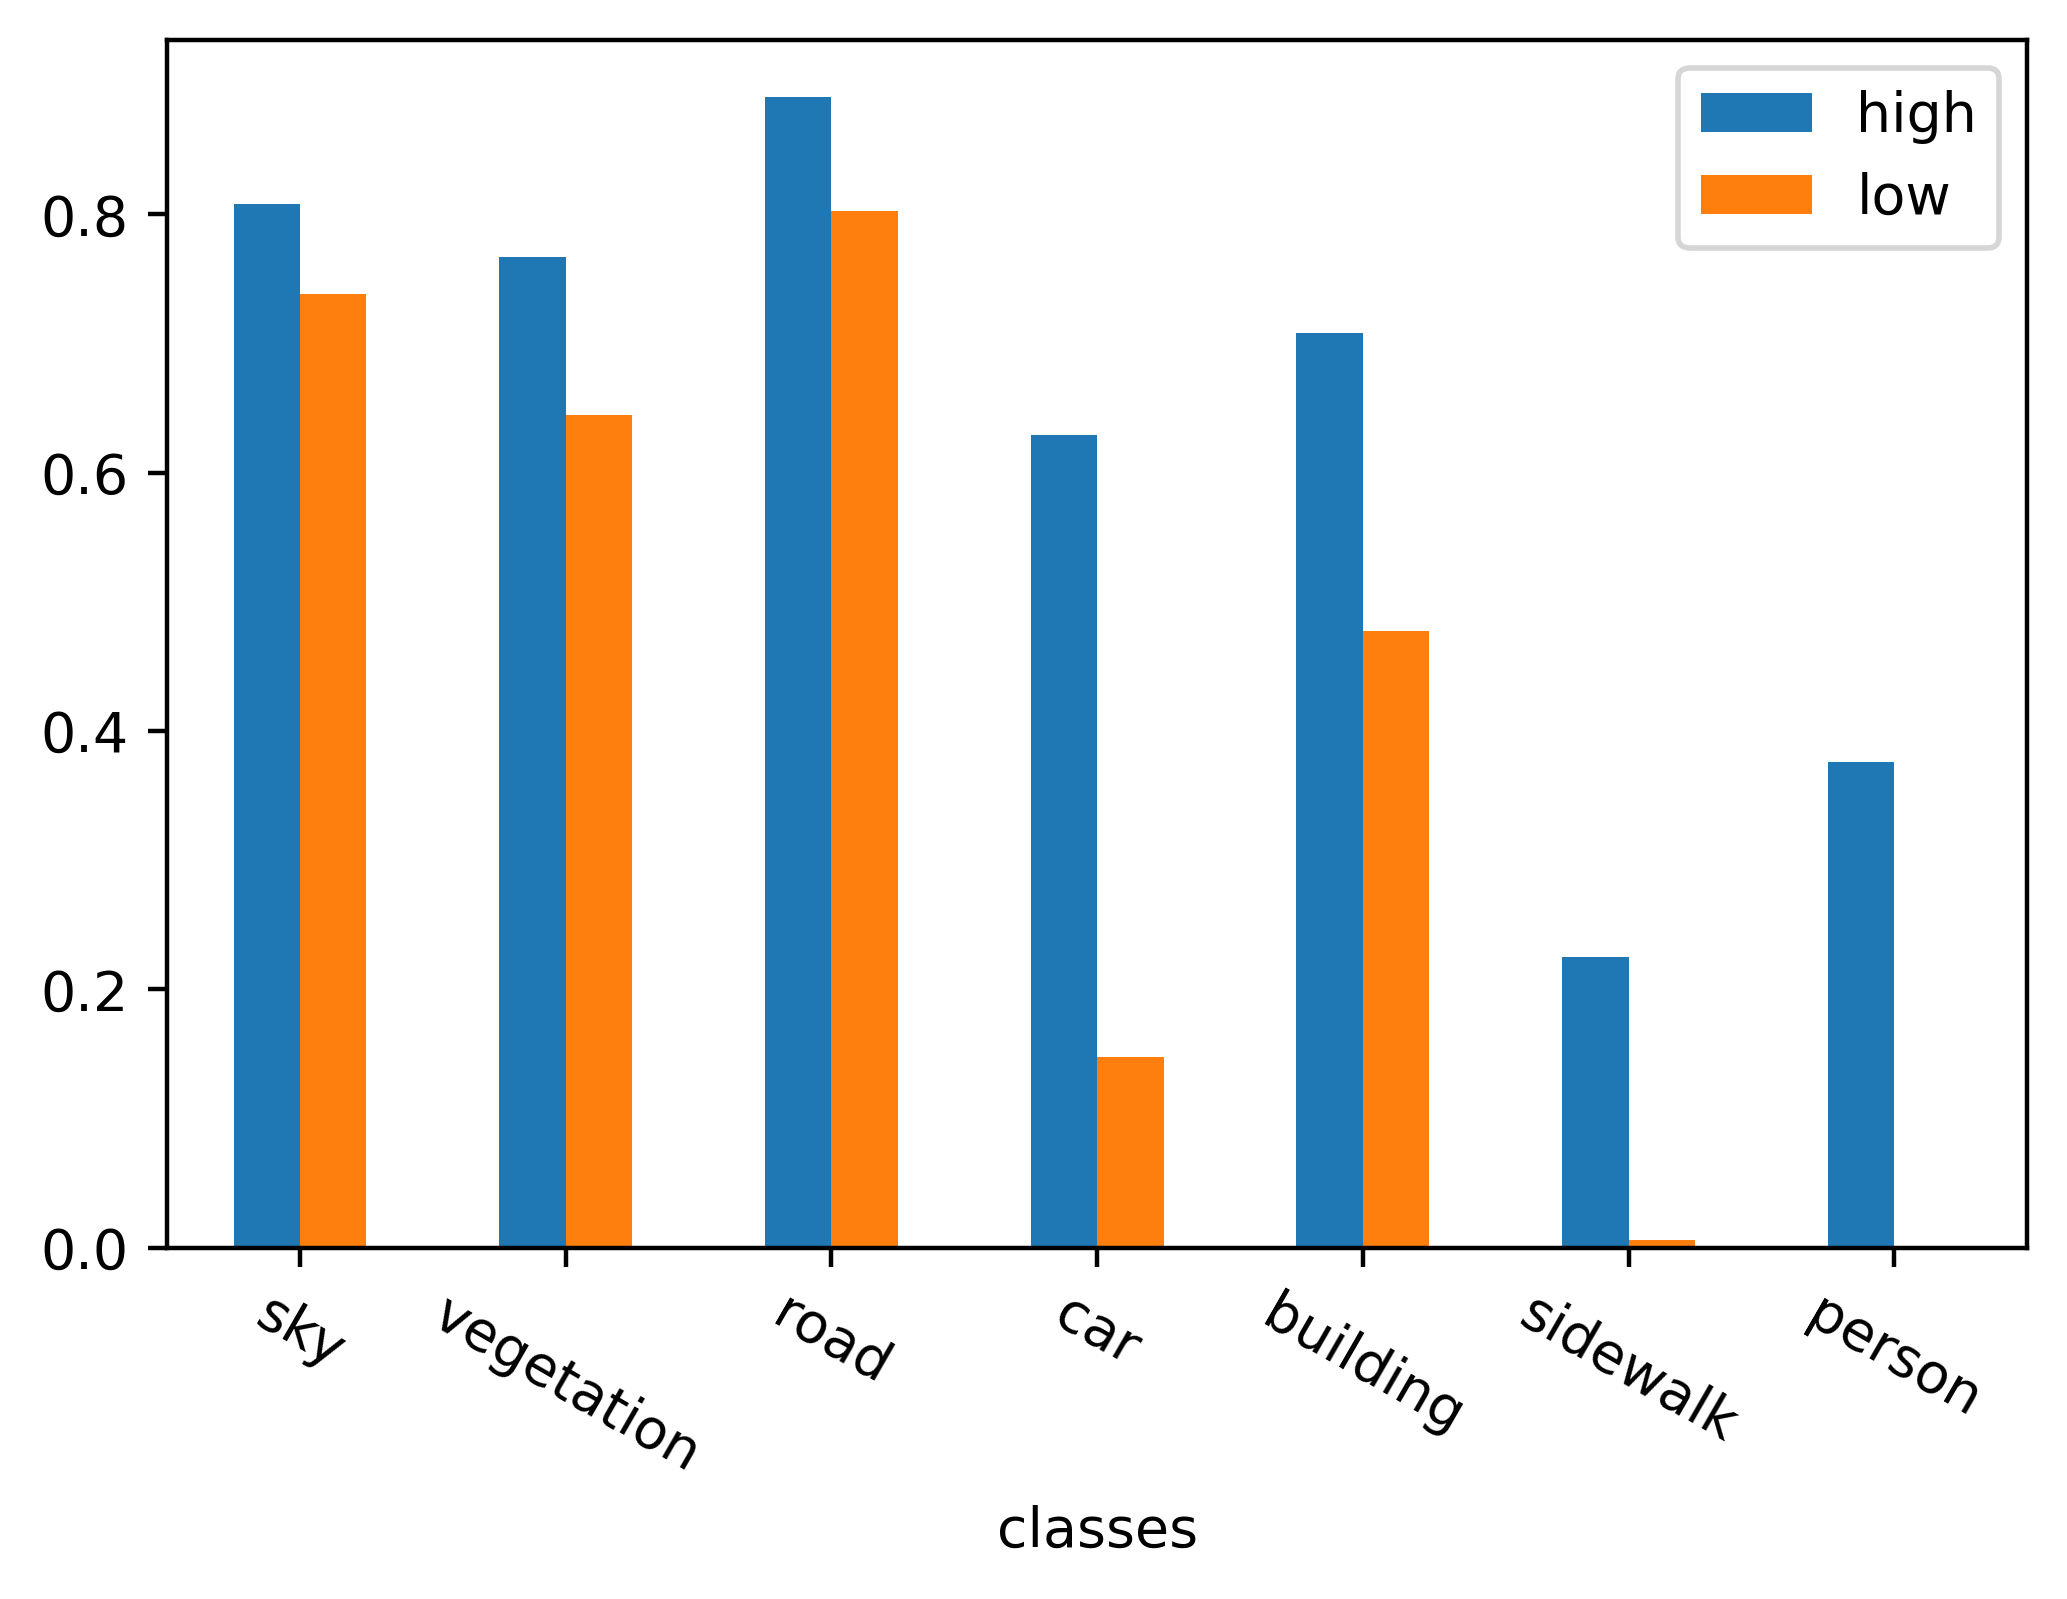

In [44]:
f1.plot.bar(x='classes', rot=-30)

In [13]:
f['road']

KeyError: 'road'

In [9]:
fnew = f.sort_values(by='high', ascending=False)
print(fnew)

          classes      high       low
10           pole  0.644391  0.005214
0            road  0.634010  0.832936
25     motorcycle  0.607049  0.000000
11      polegroup  0.490174  0.000000
16            sky  0.414603  0.744778
21            bus  0.125852  0.000000
8          bridge  0.025844  0.000000
18          rider  0.022376  0.000000
4        building  0.020227  0.580077
13   traffic sign  0.015645  0.064185
6           fence  0.015003  0.000000
19            car  0.013755  0.377266
5            wall  0.013215  0.000000
1        sidewalk  0.011971  0.027793
26        bicycle  0.011929  0.000226
15        terrain  0.006958  0.002163
9          tunnel  0.006097  0.000000
24          train  0.005608  0.000000
12  traffic light  0.004713  0.000142
7      guard rail  0.003739  0.000000
3      rail track  0.002548  0.000000
14     vegetation  0.001326  0.696551
20          truck  0.000697  0.000000
23        trailer  0.000446  0.000000
2         parking  0.000070  0.000000
17         p

<AxesSubplot:xlabel='classes'>

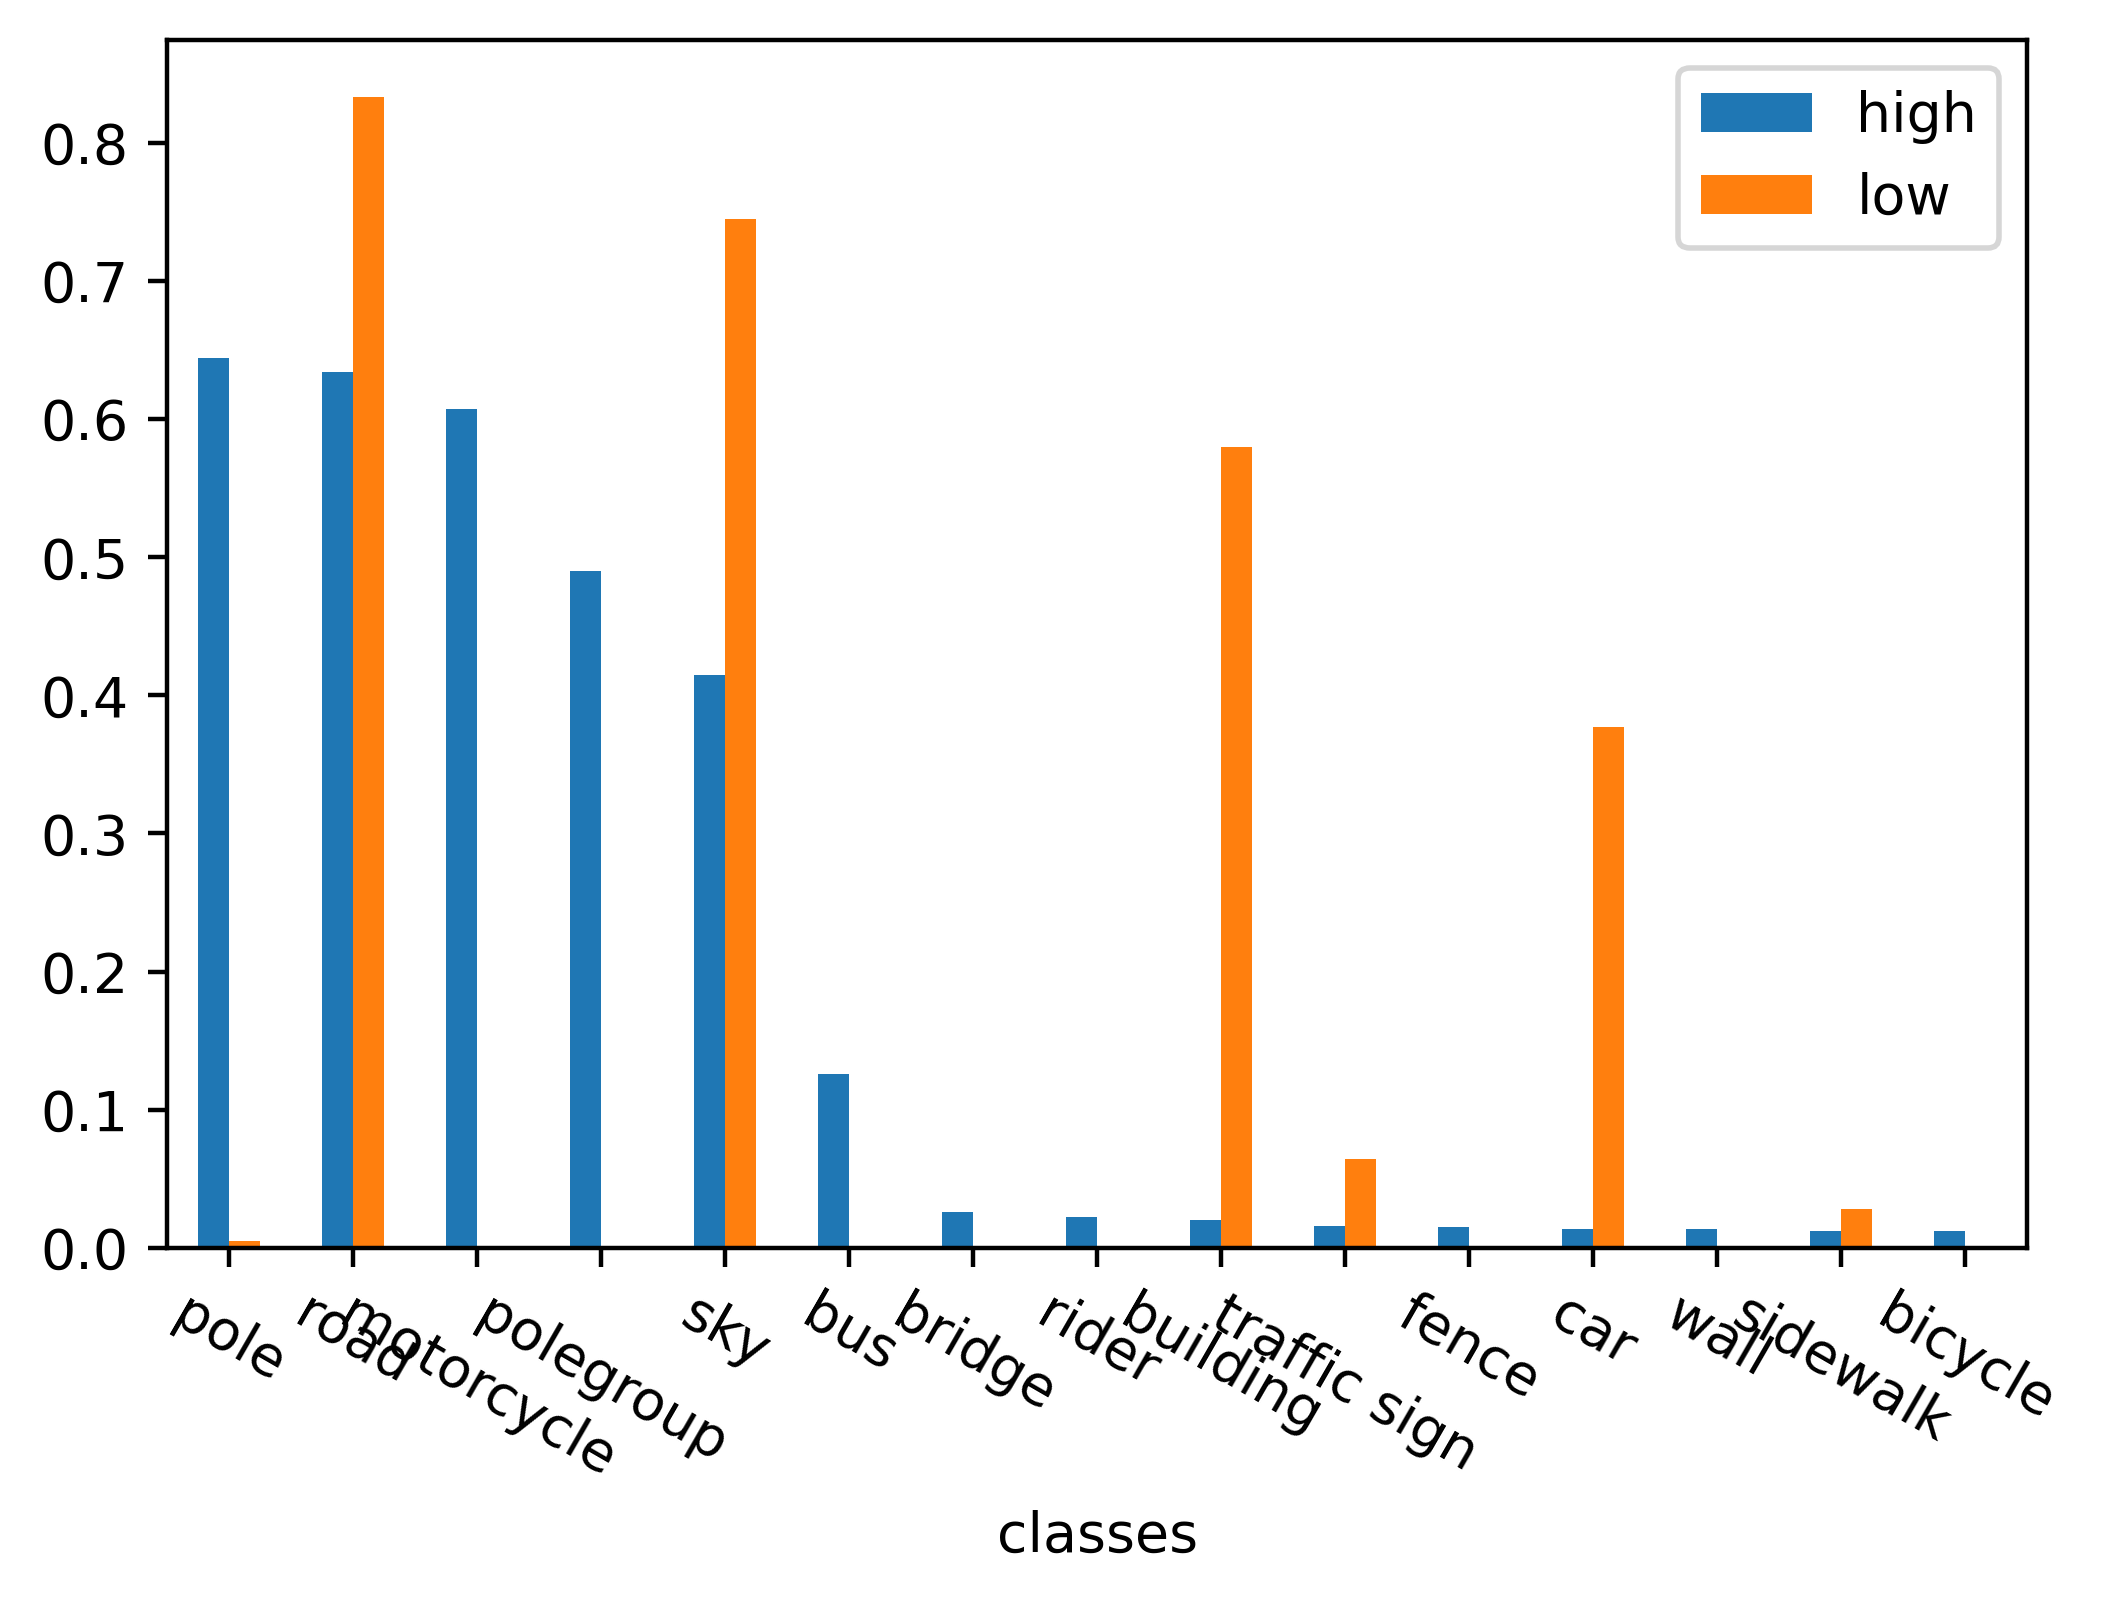

In [11]:
fnew[:15].plot.bar(x='classes', rot=-30)